# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [23]:
import pandas as pd
import seaborn as sns

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54,20], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0 , 3]})

student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,20,3


Draw a dispersion diagram (scatter plot) for the data.

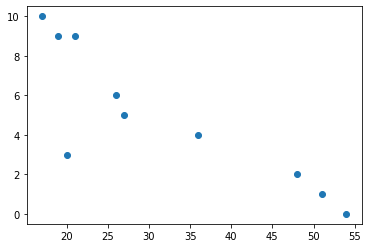

In [4]:
# Your code here.

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(student_data['Age'], student_data['Tardies'])


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
"""
There seems to be a negative correlation between the data. This would mean that the older people are, 
the less they are late. Or, the younger people are, the more they are late.

"""

'\nThere seems to be a negative correlation between the data. This would mean that the older people are, \nthe less they are late. Or, the younger people are, the more they are late.\n\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
student_data.cov()

,Age,Tardies
Age,204.100000,-43.455556
Tardies,-43.455556,12.544444


In [7]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.858812
Tardies,-0.858812,1.000000


In [8]:
"""
The covariance and correlation are negative, which follows our first analysis.


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-8-5aaab587c141>, line 2)

In [ ]:
"""

NB:
Covariance indicates the direction of the linear relationship between variables (positive or negative). 

Correlation on the other hand measures both the strength and direction of the 
linear relationship between two variables.

"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [25]:
model = LinearRegression()
#Define the X and Y variable and reshape 
X = student_data['Age'].values.reshape(-1,1)
Y = student_data['Tardies'].values.reshape(-1,1)

model.fit(X, Y)

LinearRegression()

In [22]:
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print(intercept)
print(slope)

11.691926615493497
-0.21291306004681806


In [24]:
predictions = [intercept + slope*x for x in student_data['Tardies']]
predictions


[9.562796015025317,
 11.479013555446679,
 10.627361315259407,
 9.775709075072134,
 10.840274375306224,
 11.266100495399861,
 9.775709075072134,
 10.414448255212589,
 11.691926615493497,
 11.053187435353042]

In [28]:
predictions = model.predict(X)
predictions

array([[8.07240459],
       [0.83336055],
       [5.94327399],
       [7.22075235],
       [4.02705645],
       [1.47209973],
       [7.64657847],
       [6.15618705],
       [0.19462137],
       [7.43366541]])

In [29]:
student_data['Predictions'] = predictions
student_data

,Age,Tardies,Predictions
0,17,10,8.072405
1,51,1,0.833361
2,27,5,5.943274
3,21,9,7.220752
4,36,4,4.027056
5,48,2,1.472100
6,19,9,7.646578
7,26,6,6.156187
8,54,0,0.194621
9,20,3,7.433665


In [32]:
score = model.score(X,Y)
score



0.7375579963180737

Plot your regression model on your scatter plot.

/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

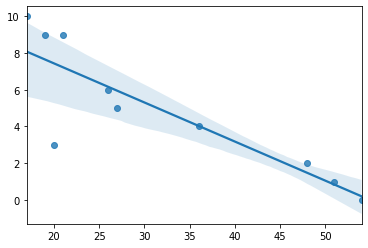

In [30]:
# Your response here.
sns.regplot(X,Y)

#Variable are X and Y, Model is Linear Regression

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 


'''Yes, as R2 (score) is close of 1 meaning that  the dependent variable can be predicted 
without error from the independent variable.

An R2 between 0 and 1 indicates the extent to which the dependent variable is predictable. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('./vehicles.csv')

vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your response here. 

vehicles[['Year','CO2 Emission Grams/Mile']].corr()

,Year,CO2 Emission Grams/Mile
Year,1.0000,-0.2223
CO2 Emission Grams/Mile,-0.2223,1.0000


In [13]:
vehicles[['Cylinders','CO2 Emission Grams/Mile']].corr()

,Cylinders,CO2 Emission Grams/Mile
Cylinders,1.000000,0.752393
CO2 Emission Grams/Mile,0.752393,1.000000


In [14]:
vehicles[['Fuel Barrels/Year','CO2 Emission Grams/Mile']].corr()

,Fuel Barrels/Year,CO2 Emission Grams/Mile
Fuel Barrels/Year,1.000000,0.986189
CO2 Emission Grams/Mile,0.986189,1.000000


In [15]:
vehicles[['Combined MPG','CO2 Emission Grams/Mile']].corr()

,Combined MPG,CO2 Emission Grams/Mile
Combined MPG,1.000000,-0.926229
CO2 Emission Grams/Mile,-0.926229,1.000000


In [17]:
vehicles[['Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Fuel Cost/Year,CO2 Emission Grams/Mile
Fuel Cost/Year,1.000000,0.930865
CO2 Emission Grams/Mile,0.930865,1.000000


In [16]:
vehicles.corr().style.background_gradient(cmap='coolwarm')

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
 """ 
 The variable which will be the mst important in determining CO2 emissions is: Fuel Barrels/Year.
 The variable which provides the least amount of helpful information for determining CO2 emissions is: Year.
 """

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [31]:
# Install a conda package in the current Jupyter kernel
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install statsmodels

  Using cached statsmodels-0.12.1-cp38-cp38-macosx_10_13_x86_64.whl (9.6 MB)
     |████████████████████████████████| 231 kB 1.1 MB/s eta 0:00:01


In [39]:
# Your response here. 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Define the X and Y variable and reshape 
X = vehicles['CO2 Emission Grams/Mile'].values.reshape(-1,1)
Y = vehicles['Fuel Barrels/Year'].values.reshape(-1,1)

model.fit(X, Y)




LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [45]:
x_vehicles = vehicles['CO2 Emission Grams/Mile']
y_vehicles = vehicles[['Year','Cylinders' ,'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
model = sm.OLS(x_vehicles, y_vehicles).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Sat, 07 Nov 2020   Prob (F-statistic):                        0.00
Time:                             17:03:31   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
"""
The adjusted R-squared value is quite high which means that the results are quite realibale.
The coeficients tells us that the most influent field is Fuel Barrels/Year with a big confidence level as well.
The result should be trusted
"""

/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

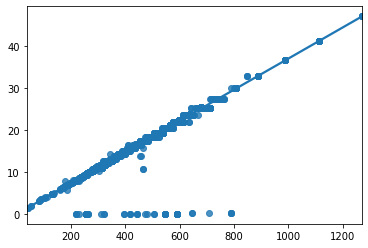

In [40]:
# Your response here. 

sns.regplot(X,Y)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 